## Task-D: Collinear features and their effect on linear models

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('task_d.csv')

In [3]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [4]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

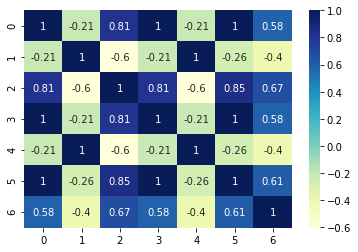

In [5]:
#Heat map for finding correlation
dataplot=sns.heatmap(pd.DataFrame(X).corr(),cmap='YlGnBu',annot=True)
plt.show()

In [6]:
#From the above heatmap i can say that (3,5) columns are highly correlated feature
#and among them i can choose one of the feature from them
#(4,1),(5,1),(5,0),(3,0),(3,5) these set of features are highly correlated among these i can drop 0 and 3 features

In [7]:
#Finding the best model for the given data
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(n_jobs=-1)


In [8]:
from sklearn.model_selection import RandomizedSearchCV
def get_best_para(est,param,X,Y):
    clf=RandomizedSearchCV(est,param,n_iter=10,n_jobs=-1)
    clf.fit(X,Y)
    return  clf.best_params_,clf.best_score_

In [9]:
param={'C':[0.1,1,10,100,0.001,0.2]}
get_best_para(clf,param,X,Y)

({'C': 0.1}, 1.0)

In [10]:
best_model=LogisticRegression(n_jobs=-1,C=0.1)
best_model.fit(X,Y)

LogisticRegression(C=0.1, n_jobs=-1)

In [11]:
#Calculating accuracy of a model
def acc(Y_true,Y_pred):
    from sklearn.metrics import confusion_matrix
    #print(confusion_matrix(Y_true,Y_pred))
    TN,FP,FN,TP = confusion_matrix(Y_true,Y_pred).ravel()
    #print(TN,FP,FN,TP)
    #Precision = TP/(TP+FP)
    #Sensitivity(recall)=TP/(TP+FN)
    #Specificity=TN/(TN+FP)
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    return Accuracy


In [12]:
Acc_best_model=acc(Y,best_model.predict(X).reshape(-1,1))

In [13]:
print(Acc_best_model)


1.0


In [14]:
#Weight of the model
best_model_coeff=best_model.coef_

In [15]:
#Adding noise to the X with e=10^-2
import random as rn
X1=X+rn.uniform(0.01,0.1)

In [16]:
#Retraining the model with Noise points
best_model.fit(X1,Y)
best_model_edited_coeff=best_model.coef_

In [17]:
Acc_best_model_edited=acc(Y,best_model.predict(X).reshape(-1,1))

In [18]:
print(Acc_best_model)

1.0


In [19]:
def diff_weight(w1,w2):
    W=(abs(w1-w2)/w1)*100
    return list(np.argsort(W)[0][0:4])
    
    

In [20]:
#Accuracy of model_1 aand model_2
print(f'The difference in accuracy of the model are {abs(Acc_best_model_edited-Acc_best_model)}')

The difference in accuracy of the model are 0.0


In [21]:
#Getting top 4 features which have highest change
l=diff_weight(best_model_coeff,Acc_best_model_edited)
temp=np.array(data.columns)
print(f'{temp[l]} are the  top 4 features whoes weight has changed')


['y' '2*y' 'z' '2*z+3*x*x'] are the  top 4 features whoes weight has changed


In [22]:
#Linear SVM
from sklearn.svm import LinearSVC
SVC=LinearSVC()

In [23]:
para={'C':[0.001,0.001,0.01,0.1,1,10,100]}
get_best_para(SVC,para,X,Y)


({'C': 0.001}, 1.0)

In [24]:
#Best For LinearSVM
best_model_SVM=LinearSVC(C=0.001)
best_model_SVM.fit(X,Y)

LinearSVC(C=0.001)

In [25]:
Acc_best_model_SVM=acc(Y,best_model_SVM.predict(X).reshape(-1,1))
print(Acc_best_model)


1.0


In [26]:
#Weight of the model
best_model_SVM_coeff=best_model_SVM.coef_

In [27]:
#Retraining the model with Noise points
best_model_SVM.fit(X1,Y)
best_model_edited_SVM_coeff=best_model.coef_

In [28]:
Acc_best_model_edited_SVM=acc(Y,best_model_SVM.predict(X).reshape(-1,1))

In [29]:
#Accuracy of model_1 aand model_2
print(f'The difference in accuracy of the model are {abs(Acc_best_model_edited_SVM-Acc_best_model_SVM)}')

The difference in accuracy of the model are 0.0


In [31]:
#Getting top 4 features which have highest change
l=diff_weight(best_model_SVM_coeff,Acc_best_model_edited_SVM)
temp=np.array(data.columns)
print(f'{temp[l]} are the  top 4 features whoes weight has changed')

['y' '2*y' 'z' '2*z+3*x*x'] are the  top 4 features whoes weight has changed


<h1>Observation</h1>
<h6>In both the cases when we use different model the same features have the high percentage change in the weight</h6>